In [6]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import backend as K
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras import losses
from tensorflow.keras import optimizers
from tensorflow.keras import initializers
from tensorflow.keras.metrics import *

from tensorflow.keras import Model, Sequential
from tensorflow.keras.models import model_from_json
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Input, Dense, Conv2D, Reshape,Conv2DTranspose,Flatten, MaxPooling2D,Dropout,UpSampling2D,concatenate, Activation

import keras_segmentation
from keras_segmentation.models.unet import vgg_unet




Using TensorFlow backend.


In [4]:
outfile = './saved_arrays/train_X_q.npy'
outfile2 = './saved_arrays/train_Y_q.npy'
outfile3 = './saved_arrays/test_X_q.npy'
outfile4 = './saved_arrays/test_Y_q.npy'

x_train = np.load(outfile)
y_train = np.load(outfile2)
x_test = np.load(outfile3)
y_test = np.load(outfile4)


In [17]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
X = np.vstack((x_train, x_test))
Y = np.vstack((y_train, y_test))

(825, 256, 256, 3)
(825, 256, 256)
(80, 256, 256, 3)
(80, 256, 256)


(905, 256, 256)

In [141]:
n_classes = 2
input_size =(256,256,3)

input_layer = Input(shape=input_size)

#encoder
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_layer)
conv1 = Dropout(0.2)(conv1)
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D((2, 2))(conv1)

conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
conv2 = Dropout(0.2)(conv2)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D((2, 2))(conv2)

#decoder
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
conv3 = Dropout(0.2)(conv3)
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)

up1 = concatenate([UpSampling2D((2, 2))(conv3), conv2], axis=-1)
conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1)
conv4 = Dropout(0.2)(conv4)
conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv4)

up2 = concatenate([UpSampling2D((2, 2))(conv4), conv1], axis=-1)
conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(up2)
conv5 = Dropout(0.2)(conv5)
conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv5)


out = Conv2D(1, (1, 1) , padding='same', activation='linear')(conv5)
out = Reshape((256, 256))(out)


model = Model(input_layer ,out, name = 'U-net')

loss = tf.keras.losses.categorical_crossentropy
opt = Adam(lr = 0.01)
model.compile(loss= loss, optimizer=opt, metrics = ['accuracy'])
model.summary()

Model: "U-net"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_19 (InputLayer)           [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d_198 (Conv2D)             (None, 256, 256, 32) 896         input_19[0][0]                   
__________________________________________________________________________________________________
dropout_90 (Dropout)            (None, 256, 256, 32) 0           conv2d_198[0][0]                 
__________________________________________________________________________________________________
conv2d_199 (Conv2D)             (None, 256, 256, 32) 9248        dropout_90[0][0]                 
______________________________________________________________________________________________

In [142]:
model.fit(x_train, y_train, epochs = 16, verbose=1,validation_data = (x_test, y_test))

Train on 825 samples, validate on 80 samples
Epoch 1/16
825/825 [==============================] - 28s 34ms/sample - loss: 124.2884 - accuracy: 0.0088 - val_loss: 120.8860 - val_accuracy: 0.0246
Epoch 2/16
825/825 [==============================] - 26s 32ms/sample - loss: 110.9373 - accuracy: 0.0201 - val_loss: 113.9084 - val_accuracy: 0.0276
Epoch 3/16
825/825 [==============================] - 27s 32ms/sample - loss: 106.2201 - accuracy: 0.0226 - val_loss: 110.8731 - val_accuracy: 0.0270
Epoch 4/16
825/825 [==============================] - 27s 32ms/sample - loss: 103.9668 - accuracy: 0.0201 - val_loss: 109.5353 - val_accuracy: 0.0198
Epoch 5/16
825/825 [==============================] - 27s 33ms/sample - loss: 102.9943 - accuracy: 0.0207 - val_loss: 108.5790 - val_accuracy: 0.0183
Epoch 6/16
825/825 [==============================] - 27s 32ms/sample - loss: 103.3382 - accuracy: 0.0256 - val_loss: 109.8293 - val_accuracy: 0.0165
Epoch 7/16
825/825 [==============================] - 2

In [155]:
#model.fit(X, Y, epochs = 23, batch_size = 32, verbose=1, validation_split= 0.10)

In [143]:
pred = model.predict(x_test)

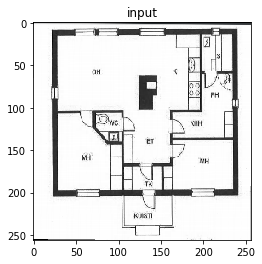

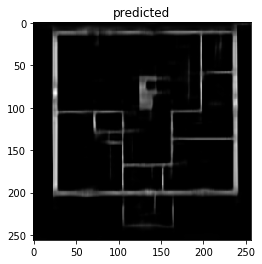

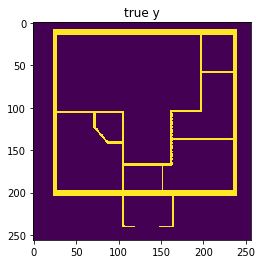

In [152]:
n = 0
plt.imshow(x_test[n])
plt.title('input')
plt.show()
plt.imshow(pred[n], cmap = 'gray')
plt.title('predicted')
plt.show()
plt.imshow(y_test[n])
plt.title('true y')
plt.show()


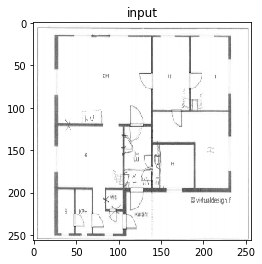

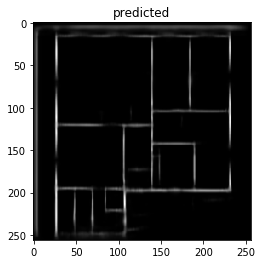

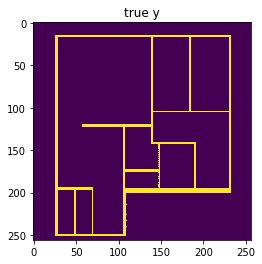

In [156]:
n = 4
plt.imshow(x_test[n])
plt.title('input')
plt.show()
plt.imshow(pred[n], cmap = 'gray')
plt.title('predicted')
plt.show()
plt.imshow(y_test[n])
plt.title('true y')
plt.show()


In [154]:
#model.save('wall')
model.save_weights('new_model.h5')